## Library Import

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Activation, Dropout, Conv2D, MaxPool2D
from tensorflow.keras import layers, models
from tensorflow.keras import backend

import random as rd
from sklearn.metrics import accuracy_score

## Data Loading

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 685
다음 그림은 Coat 입니다.


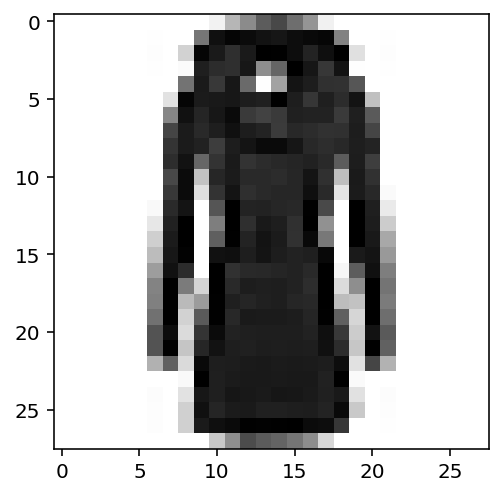

In [5]:
id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[y_test[id]]} 입니다.')
plt.imshow(x_test[id], cmap='Greys')
plt.show()

In [6]:
# Min-Max Scaling

max_num = x_train.max()

x_train = x_train/max_num
x_test = x_test/max_num

print(x_train.max(), x_train.min())

1.0 0.0


In [7]:
# Reshape (28, 28 ,1)
x_train.shape

(60000, 28, 28)

In [8]:
_, h, w, = x_train.shape

print(h, w)

28 28


In [9]:
x_train = x_train.reshape(x_train.shape[0], h, w, 1)
x_test = x_test.reshape(x_test.shape[0], h, w, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [10]:
# one-hot encoding

from tensorflow.keras.utils import to_categorical

In [11]:
class_n = len(np.unique(y_train))

y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)

## Modeling

In [12]:
# 1. Session Clear
clear_session()

# 2. Model
model = Sequential()

# 3. Layer
model.add(Input(shape=(28, 28 ,1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# 4. Compile
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [14]:
# Early Stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [16]:
# 5. fit
history = model.fit(x_train, y_train, epochs=100, batch_size=512,
                    validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/100
94/94 [==============================] - 18s 48ms/step - loss: 0.4602 - accuracy: 0.8409 - val_loss: 2.3203 - val_accuracy: 0.3720
Epoch 2/100
94/94 [==============================] - 4s 38ms/step - loss: 0.2823 - accuracy: 0.8960 - val_loss: 3.0908 - val_accuracy: 0.1919
Epoch 3/100
94/94 [==============================] - 4s 38ms/step - loss: 0.2399 - accuracy: 0.9103 - val_loss: 2.9721 - val_accuracy: 0.2873
Epoch 4/100
94/94 [==============================] - 4s 38ms/step - loss: 0.2101 - accuracy: 0.9222 - val_loss: 3.6359 - val_accuracy: 0.3165
Epoch 5/100
94/94 [==============================] - 4s 38ms/step - loss: 0.1894 - accuracy: 0.9313 - val_loss: 1.9120 - val_accuracy: 0.5585
Epoch 6/100
94/94 [==============================] - 4s 38ms/step - loss: 0.1704 - accuracy: 0.9379 - val_loss: 0.8718 - val_accuracy: 0.7665
Epoch 7/100
94/94 [==============================] - 4s 38ms/step - loss: 0.1579 - accuracy: 0.9408 - val_loss: 0.3808 - val_accuracy: 0.8709
Epoch